# Market Basket Analysis - Mall Customer Segmentation using K Means Clustering

Before implementation, let's understand what type of problem we will solve here. So, we have a dataset of Mall_Customers, which is the data of customers who visit the mall and spend there.

In the given dataset, we have Customer_Id, Gender, Age, Annual Income ($), and Spending Score (which is the calculated value of how much a customer has spent in the mall, the more the value, the more he has spent). From this dataset, we need to calculate some patterns, as it is an unsupervised method, so we don't know what to calculate exactly.

Download the dataset using this link: https://drive.google.com/uc?export=download&id=1DF6uovG5nrtj1isd-G7_xOIGIuE1E_ff

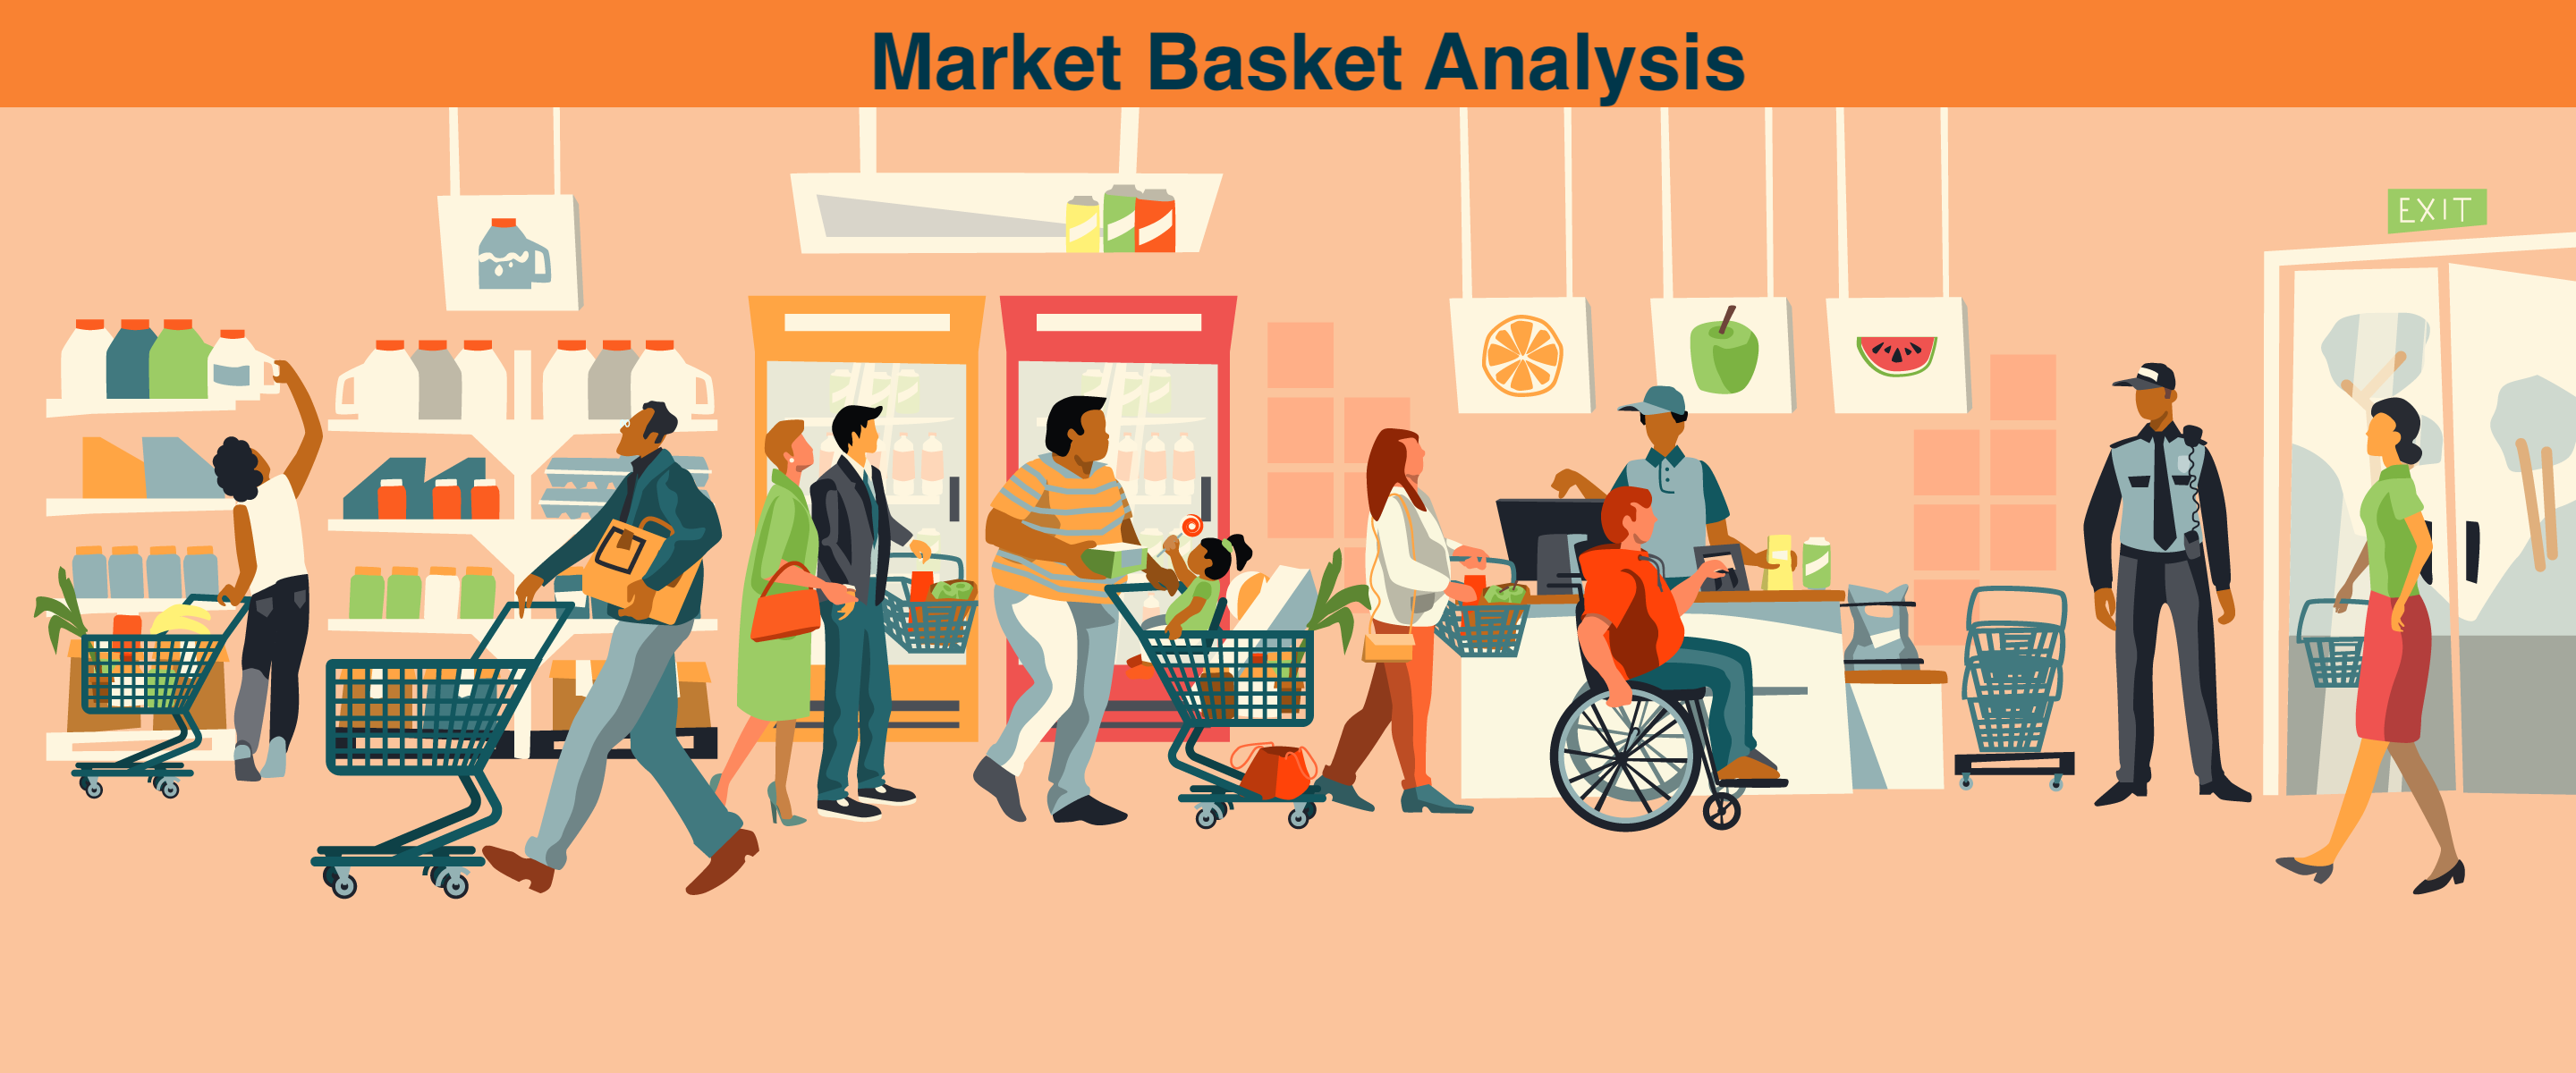

In [1]:
# importing libraries    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
# importing dataset file
url = "https://drive.google.com/uc?export=download&id=1DF6uovG5nrtj1isd-G7_xOIGIuE1E_ff"

In [3]:
# importing the dataset  
df = pd.read_csv(url)
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


we are extracting only 3rd and 4th feature. It is because we need a 2d plot to visualize the model, and some features are not required, such as customer_id.

In [5]:
# take only Annual Income and Spending Score column
x = df.iloc[:, [3, 4]].values

# preview the dataset
x[0:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]], dtype=int64)

## Finding the optimal number of clusters using the elbow method
Now, we will try to find the optimal number of clusters for our clustering problem using the elbow method. The elbow method uses the WCSS concept to draw the plot by plotting WCSS values on the Y-axis and the number of clusters on the X-axis. So we are going to calculate the value for WCSS for different k values ranging from 1 to 10. 

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


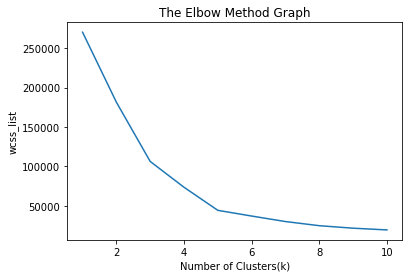

In [7]:
# finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans
wcss_list = [] # Initializing the list for the vlaues of WCSS

# Using for Loop for iteration from 1 to 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x)
    wcss_list.append(kmeans.inertia_)
    
# Plot the elbow graph
plt.plot(range(1, 11), wcss_list)
plt.title("The Elbow Method Graph")
plt.xlabel("Number of Clusters(k)")
plt.ylabel('wcss_list')
plt.show()

## Training the K-means algorithm on the training dataset
As we have got the number of clusters, so we can now train the model on the dataset.

To train the model, we will use the same two lines of code as we have used in the above cell, but here instead of using i, we will use 5, as we know there are 5 clusters that need to be formed.

In [9]:
# training the K-means model on a dataset  
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_predict = kmeans.fit_predict(x)

## Visualizing the Clusters
As we have 5 clusters for our model, so we will visualize each cluster one by one. To visualize the clusters will use scatter plot using plt.scatter() function of matplotlib.

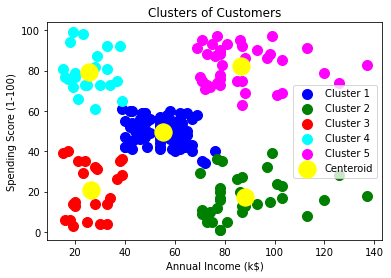

In [10]:
# visulaizing the clusters  
# For First Cluster
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s=100, c='blue', label='Cluster 1')

# For Second Cluster
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s=100, c='green', label='Cluster 2')

# For Third Cluster
plt.scatter(x[y_predict == 2, 0], x[y_predict == 2, 1], s=100, c='red', label='Cluster 3')

# For Fourth Cluster
plt.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s=100, c='cyan', label='Cluster 4')

# For Fifth Cluster
plt.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s=100, c='magenta', label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centeroid')

plt.title("Clusters of Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

The output image is clearly showing the five different clusters with different colors. The clusters are formed between two parameters of the dataset; Annual income of customer and Spending. We can change the colors and labels as per the requirement or choice. We can also observe some points from the above patterns, which are given below:

- Cluster1 shows the customers with average salary and average spending so we can categorize these customers as **normal**.
- Cluster2 shows the customer has a high income but low spending, so we can categorize them as **careful**.
- Cluster3 shows the low income and also low spending so they can be categorized as **sensible**.
- Cluster4 shows the customers with low income with very high spending so they can be categorized as **careless**.
- Cluster5 shows the customers with high income and high spending so they can be categorized as **target**, and these customers can be the most profitable customers for the mall owner.